Подготовка к ВКР_часть3

In [2]:
pip install plotly

     ---------------------------------------- 15.3/15.3 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузка очищенного от выбросов датасета до нормализации:
df_clear_3 = pd.read_excel(r"C:\Users\Alekseeva Aleksandra\Desktop\DS_МГТУ Баумана\ВКР\Подготовка данных для ВКР\df_clear.xlsx")
# загрузка стандартизованного датасета:
df_std_3 = pd.read_excel(r"C:\Users\Alekseeva Aleksandra\Desktop\DS_МГТУ Баумана\ВКР\Подготовка данных для ВКР\data_std.xlsx")

In [3]:
df_clear_3.head()

,Unnamed: 0,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [4]:
df_std_3.head()

,Unnamed: 0,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043


In [5]:
# удаляем неинформативные столбцы в загруженных датасетах:
# удаление неинформативного столбца и сохранение результатов в новую переменную:
df_st = df_std_3.drop(columns = 'Unnamed: 0')
df_cl = df_clear_3.drop(columns = 'Unnamed: 0')

In [6]:
# просмотр результатов удаления по первым пяти строкам:
df_st.head()

,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043


In [7]:
# Определяем входные и выходные данные для модели
tv = df_clear_3['Соотношение_матрица_наполнитель']
tr_v = df_st.loc[:, df_st.columns != 'Соотношение_матрица_наполнитель']
# Разбиваем выборки на обучающую и тестовую
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [8]:
x_test_n.shape

(281, 12)

In [9]:
x_train_n.columns

Index(['Плотность', 'Модуль_упругости', 'Количество_отвердителя',
       'Содержание_эпоксидных_групп', 'Температура_вспышки',
       'Поверхностная_плотность', 'Модуль_упругости_при_растяжении',
       'Прочность_при_растяжении', 'Потребление_смолы', 'Угол_нашивки',
       'Шаг_нашивки', 'Плотность_нашивки'],
      dtype='object')

Задаем функцию для построения модели нейросети в оболочке KerasClassifier.
Используем технику выпадения - технику, при которой случайно выбранные нейроны игнорируются во время тренировки. Это означает, что их вклад в активацию нижестоящих нейронов временно удален на прямом проходе, и любые обновления веса не применяются к нейрону на обратном проходе.
Поиск оптимальных параметров производим с помощью поиска по сетке GridSearch с количеством блоков = 10.

In [10]:
# для построения модели используем:
# в качестве активационной функцию softmax для того, чтобы значения находились в диапазоне от 0 до 1 и могли использоваться
# в качестве прогнозируемых вероятностей; в качестве оптимизатора - стохастический градиентный спуск, который является
# самым распростаненным методом и эффективен для большинства моделей; коэффициент отсева (выпадения) принимаем равным 0,1 
#(т.е. 10% нейронов, выбранных случайным образом, игнорируются во время обучения)
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
    # задаем фиксированные начальные значения для устранения случайности при повторных вызовах генератора случайных чисел
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # выбираем самый распростаненный вид модели - стек слоев (Sequential)
    model = Sequential()
    # задаем настройку для входного слоя
    model.add(Dense(lyrs[0], input_dim=x_train_n.shape[1], activation=act)) 
    # последовательно применяем настройку для каждого слоя
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    # добавляем слой выпадения (отсеивания)
    model.add(Dropout(dr))
    # добавляем выходной полносвязный слой с активационной функцией tanh, которая хорошо подходит для комбинации слоёв, 
    # диапазон значений функции -(-1, 1)
    model.add(Dense(3, activation='tanh'))
    # производим обучение модели
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
    # возвращаем обученную модель
    return model

Поиск лучшей архитектуры нейросети

In [11]:
# создаем объект model класса KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
# определяем гиперпараметры модели
batch_size = [4, 10, 20, 50, 100] # размер пакета (количество выборок, которые будут распространяться по сети)
epochs = [10, 50, 100, 200, 300] # количество эпох
param_grid = dict(batch_size=batch_size, epochs=epochs)

Поиск оптимальных параметров.
Поскольку поиск по сетке выполняется достаточно долго и есть риск аварийного прерывания кода в случае перегрузки из-за большого числа комбинаций, будем производить поиск по сетке последовательно, для каждого одного-двух гиперпараметров отдельно, подставляя найденные значения в следующий поиск.

In [12]:
# задаем параметры сетки
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=-1)
# применяем сетку с заданными параметрами к обучающей выборке
grid_result = grid.fit(x_train_n, y_train_n)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [13]:
# выводим лучшую комбинацию гиперпараметров batch_size и epochs, а также - результаты для каждой комбинации гиперпараметров
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001515 using {'batch_size': 4, 'epochs': 10}
0.001515 (0.004545) with: {'batch_size': 4, 'epochs': 10}
0.001515 (0.004545) with: {'batch_size': 4, 'epochs': 50}
0.001515 (0.004545) with: {'batch_size': 4, 'epochs': 100}
0.001515 (0.004545) with: {'batch_size': 4, 'epochs': 200}
0.001515 (0.004545) with: {'batch_size': 4, 'epochs': 300}
0.001515 (0.004545) with: {'batch_size': 10, 'epochs': 10}
0.001515 (0.004545) with: {'batch_size': 10, 'epochs': 50}
0.001515 (0.004545) with: {'batch_size': 10, 'epochs': 100}
0.001515 (0.004545) with: {'batch_size': 10, 'epochs': 200}
0.001515 (0.004545) with: {'batch_size': 10, 'epochs': 300}
0.001515 (0.004545) with: {'batch_size': 20, 'epochs': 10}
0.001515 (0.004545) with: {'batch_size': 20, 'epochs': 50}
0.001515 (0.004545) with: {'batch_size': 20, 'epochs': 100}
0.001515 (0.004545) with: {'batch_size': 20, 'epochs': 200}
0.001515 (0.004545) with: {'batch_size': 20, 'epochs': 300}
0.001515 (0.004545) with: {'batch_size': 50, 'epochs': 10}

Выводы. Наилучшей комбинацией значений гиперпараметров является: 
  "размер пакета" = 4;
  "число эпох" = 10.

In [14]:
# повторно строим модель с найденными оптимальными гиперпараметрами
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)

In [15]:
# производим выбор наилучшего оптимизатора для модели нейросети
# задаем список гиперпараметров
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)
# производим поиск по сетке
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train_n, y_train_n)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ............................................opt=SGD; total time=   2.6s
[CV] END ............................................opt=SGD; total time=   2.5s
[CV] END ............................................opt=SGD; total time=   2.6s
[CV] END ............................................opt=SGD; total time=   2.7s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ............................................opt=SGD; total time=   2.3s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ............................................opt=SGD; total time=   3.0s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ........................................opt=RMSprop; total time=   2.3s
[CV] END .......................................

In [16]:
# выводим результаты поиска
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.003054 using {'opt': 'Adadelta'}
0.001515 (0.004545) with: {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'RMSprop'}
0.000000 (0.000000) with: {'opt': 'Adagrad'}
0.003054 (0.006107) with: {'opt': 'Adadelta'}
0.001515 (0.004545) with: {'opt': 'Adam'}
0.001515 (0.004545) with: {'opt': 'Nadam'}


Выводы: 
1) наилучшим оптимизатором является алгоритм SGD;
2) наилучшей комбинацией значений гиперпараметров является: 
    "размер пакета" = 4;
    "число эпох" = 10.

In [17]:
# Производим поиск наилучшей комбинации слоев
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)
# исследуем варианты с одним, двумя, тремя и четырьмя слоями (для трёх слоев рассмотрим несколько вариантов, поскольку это количество слоев для нашей нейросети предполагается наиболее оптимальным)
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train_n, y_train_n)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=   2.6s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END ...........................................lyrs=[8]; total time=   2.4s
[CV] END ...........................................lyrs=[8]; total time=   2.4s
[CV] END ...........................................lyrs=[8]; total time=   2.5s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END ...........................................lyrs=[8]; total time=   2.3s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END .......................................lyrs=[16, 4]; total time=   2.4s
[CV] END .......................................

In [18]:
# выводим результаты поиска наилучшей комбинации слоев:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.003030 using {'lyrs': [32, 8, 3]}
0.001515 (0.004545) with: {'lyrs': [8]}
0.001515 (0.004545) with: {'lyrs': [16, 4]}
0.003030 (0.006061) with: {'lyrs': [32, 8, 3]}
0.001515 (0.004545) with: {'lyrs': [12, 6, 3]}
0.001515 (0.004545) with: {'lyrs': [64, 64, 3]}
0.001515 (0.004545) with: {'lyrs': [128, 64, 16, 3]}


In [19]:
# Производим поиск наилучшего значения функции активации:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train_n, y_train_n)

In [20]:
# выводим результаты поиска:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.003054 using {'act': 'sigmoid'}
0.001515 (0.004545) with: {'act': 'softmax'}
0.001515 (0.004545) with: {'act': 'softplus'}
0.001515 (0.004545) with: {'act': 'softsign'}
0.001515 (0.004545) with: {'act': 'relu'}
0.001515 (0.004545) with: {'act': 'tanh'}
0.003054 (0.006107) with: {'act': 'sigmoid'}
0.001515 (0.004545) with: {'act': 'hard_sigmoid'}
0.001515 (0.004545) with: {'act': 'linear'}


In [21]:
# Производим поиск наилучшего значения коэффициента отсева:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train_n, y_train_n)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   9.2s
[CV] END .............................................dr=0.0; total time=   8.4s
[CV] END .............................................dr=0.0; total time=   8.3s
[CV] END .............................................dr=0.0; total time=   8.4s
[CV] END .............................................dr=0.0; total time=   8.6s
[CV] END .............................................dr=0.0; total time=   8.5s
[CV] END .............................................dr=0.0; total time=   8.2s
[CV] END .............................................dr=0.0; total time=   8.6s
[CV] END .............................................dr=0.0; total time=   8.7s
[CV] END .............................................dr=0.0; total time=   9.5s
[CV] END ............................................dr=0.01; total time=   8.6s
[CV] END .......................................

In [22]:
# выводим результаты поиска:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001515 using {'dr': 0.0}
0.001515 (0.004545) with: {'dr': 0.0}
0.001515 (0.004545) with: {'dr': 0.01}
0.001515 (0.004545) with: {'dr': 0.05}
0.001515 (0.004545) with: {'dr': 0.1}
0.001515 (0.004545) with: {'dr': 0.2}
0.001515 (0.004545) with: {'dr': 0.3}
0.001515 (0.004545) with: {'dr': 0.5}


In [43]:
# построение окончательной модели с подобранными оптимальными параметрами:
model = create_model(lyrs=[32, 8, 3],act='sigmoid', opt='Adadelta', dr=0.00)
print(model.summary())

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_510 (Dense)           (None, 32)                416       
                                                                 
 dense_511 (Dense)           (None, 8)                 264       
                                                                 
 dense_512 (Dense)           (None, 3)                 27        
                                                                 
 dropout_200 (Dropout)       (None, 3)                 0         
                                                                 
 dense_513 (Dense)           (None, 3)                 12        
                                                                 
Total params: 719
Trainable params: 719
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# обучаем нейросеть, 80/20 CV
model_hist = model.fit(x_train_n, 
    y_train_n, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 31.8785 - mae: 3.0434 - accuracy: 0.0000e+00 - val_loss: 30.5280 - val_mae: 2.9170 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 31.8775 - mae: 3.0434 - accuracy: 0.0000e+00 - val_loss: 30.5271 - val_mae: 2.9171 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 31.8765 - mae: 3.0434 - accuracy: 0.0000e+00 - val_loss: 30.5261 - val_mae: 2.9171 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 31.8755 - mae: 3.0435 - accuracy: 0.0000e+00 - val_loss: 30.5252 - val_mae: 2.9171 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 31.8745 - mae: 3.0435 - accuracy: 0.0000e+00 - val_loss: 30.5242 - val_mae: 2.9171 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 31.8734 - ma

17/17 [==============================] - 0s 4ms/step - loss: 31.7623 - mae: 3.0463 - accuracy: 0.0000e+00 - val_loss: 30.4167 - val_mae: 2.9200 - val_accuracy: 0.0000e+00
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 31.7607 - mae: 3.0464 - accuracy: 0.0000e+00 - val_loss: 30.4152 - val_mae: 2.9200 - val_accuracy: 0.0000e+00
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 31.7592 - mae: 3.0464 - accuracy: 0.0000e+00 - val_loss: 30.4137 - val_mae: 2.9201 - val_accuracy: 0.0000e+00
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 31.7577 - mae: 3.0465 - accuracy: 0.0000e+00 - val_loss: 30.4122 - val_mae: 2.9201 - val_accuracy: 0.0000e+00
Epoch 93/100
17/17 [==============================] - 0s 3ms/step - loss: 31.7561 - mae: 3.0465 - accuracy: 0.0000e+00 - val_loss: 30.4108 - val_mae: 2.9202 - val_accuracy: 0.0000e+00
Epoch 94/100
17/17 [==============================] - 0s 3ms/step - loss: 31.7546 - mae: 3.04

In [30]:
# Посмотрим на потери модели

model_hist.history

{'loss': [31.878469467163086,
  31.87748908996582,
  31.87649154663086,
  31.875476837158203,
  31.87446403503418,
  31.873430252075195,
  31.872394561767578,
  31.871335983276367,
  31.870262145996094,
  31.86919593811035,
  31.86810874938965,
  31.86701202392578,
  31.865909576416016,
  31.86479377746582,
  31.86366844177246,
  31.862539291381836,
  31.861398696899414,
  31.86024284362793,
  31.859073638916016,
  31.857921600341797,
  31.85674285888672,
  31.855554580688477,
  31.85436248779297,
  31.8531494140625,
  31.851938247680664,
  31.85071563720703,
  31.8494930267334,
  31.84825325012207,
  31.847015380859375,
  31.845762252807617,
  31.844507217407227,
  31.843246459960938,
  31.841983795166016,
  31.840694427490234,
  31.839414596557617,
  31.83812141418457,
  31.836816787719727,
  31.835512161254883,
  31.83420753479004,
  31.83289909362793,
  31.83156967163086,
  31.830245971679688,
  31.828907012939453,
  31.82756233215332,
  31.826210021972656,
  31.824851989746094,
  

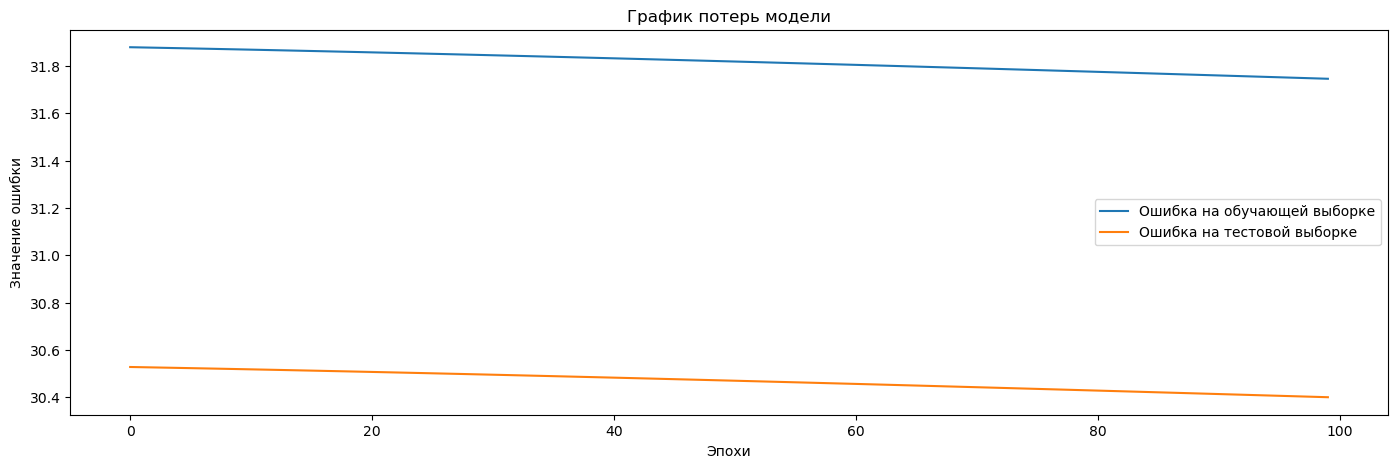

In [31]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist)

9/9 [==============================] - 0s 1ms/step


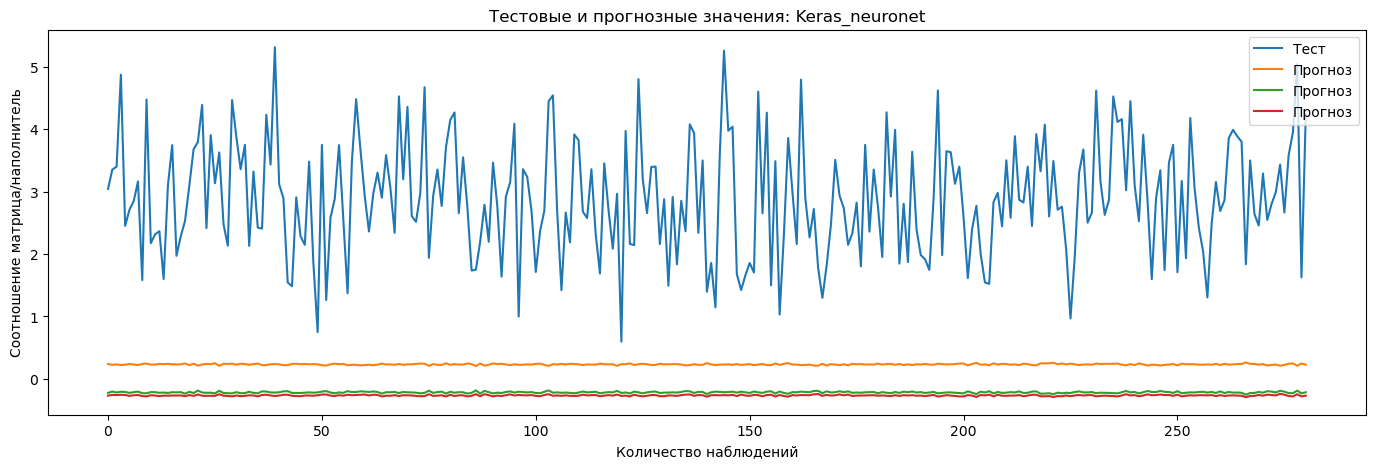

In [32]:
# Зададим функцию для визуализации факт/прогноз для результатов модели
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test_n.values, model.predict(x_test_n.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')